# Generating a Data Set of Optimal Trajectories

In [1]:
# We first import the resources
import sys
sys.path.append('..')
from Trajectory import Point_Lander
from Optimisation import Hermite_Simpson
from PyGMO import *
from numpy import *
from pandas import *
import matplotlib.pyplot as plt

In [2]:
# We instantiate the problem
prob = Hermite_Simpson(Point_Lander(si=[0,1000,20,-5,9900]))

In [3]:
# Let us first supply a ballistic trajectory as a guess
zguess = prob.Guess.Ballistic(tf=28)

In [4]:
# Decode the guess so we can visualise
tf, cb, s, c = prob.Decode(zguess)

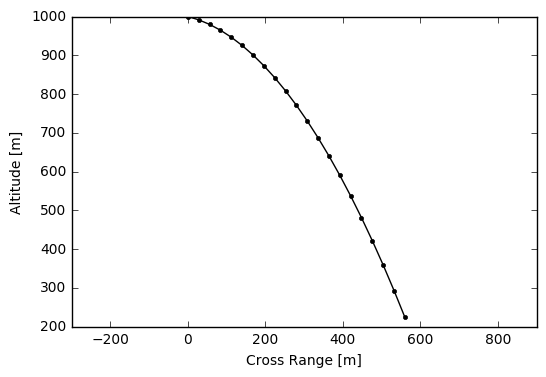

In [5]:
plt.plot(s[:,0], s[:,1], 'k.-')
plt.axes().set_aspect('equal', 'datalim')
plt.xlabel('Cross Range [m]')
plt.ylabel('Altitude [m]')
plt.show()

In [6]:
# Use SLSQP and alternatively Monotonic Basin Hopping
alg1 = algorithm.scipy_slsqp(max_iter=3000, screen_output=True)
alg2 = algorithm.mbh(alg1, screen_output=True)

In [7]:
# Instantiate a population with 1 individual
pop = population(prob)
# and add the guess
pop.push_back(zguess)

In [8]:
# We then optimise the trajectory
pop = alg1.evolve(pop)

  NIT    FC           OBJFUN            GNORM
    1   231    -9.900000E+03     1.000000E+00
    2   463    -9.910000E+03     1.000000E+00
    3   694    -9.910999E+03     1.000000E+00
    4   925    -9.912809E+03     1.000000E+00
    5  1156    -9.914560E+03     1.000000E+00
    6  1388    -9.913254E+03     1.000000E+00
    7  1620    -9.912259E+03     1.000000E+00
    8  1852    -9.909657E+03     1.000000E+00
    9  2084    -9.900957E+03     1.000000E+00
   10  2315    -9.884098E+03     1.000000E+00
   11  2547    -9.884696E+03     1.000000E+00
   12  2778    -9.878202E+03     1.000000E+00
   13  3009    -9.863558E+03     1.000000E+00
   14  3240    -9.852966E+03     1.000000E+00
   15  3471    -9.847952E+03     1.000000E+00
   16  3702    -9.835360E+03     1.000000E+00
   17  3933    -9.804813E+03     1.000000E+00
   18  4164    -9.775007E+03     1.000000E+00
   19  4395    -9.731773E+03     1.000000E+00
   20  4626    -9.581212E+03     1.000000E+00
   21  4858    -9.489042E+03     1

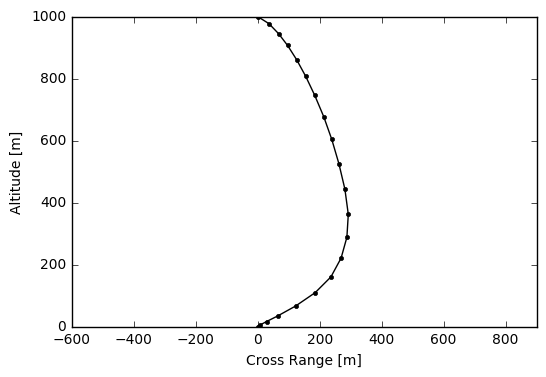

In [11]:
# We now visualise the optimised trajectory
tf, cb, s, c = prob.Decode(pop.champion.x)
plt.plot(s[:,0], s[:,1], 'k.-')
plt.axes().set_aspect('equal', 'datalim')
plt.xlabel('Cross Range [m]')
plt.ylabel('Altitude [m]')
plt.show()

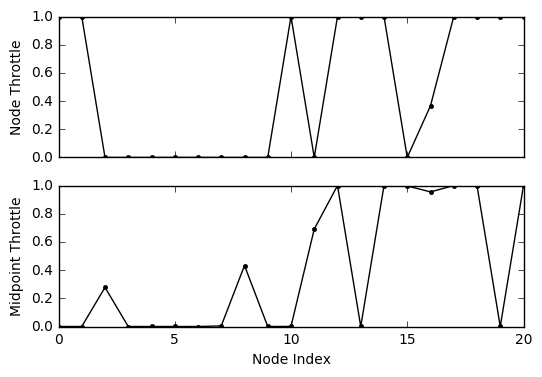

In [59]:
# and look at the control throttle
plt.close('all')
f, ax = plt.subplots(2, sharex=True)
ax[0].plot(c[:,0], 'k.-')
ax[1].plot(cb[:,0], 'k.-')
plt.xlabel('Node Index')
ax[0].set_ylabel('Node Throttle')
ax[1].set_ylabel('Midpoint Throttle')
plt.show()

In [84]:
# We save the optimised trajectory decision vector
save('HSD0', pop.champion.x)

In [92]:
# We perturb the initial state and find a optimsal trajectory
# Decreasing the velocity by a few m/s for demonstration
prob = Hermite_Simpson(Point_Lander(si=[0,1000,10,-5,9900]))
# and create a population for the new problem
pop = population(prob)
# and add the previous population decision vector
pop.push_back(z)

In [95]:
# We then optimise the trajectory, this now will not take long!
pop = alg1.evolve(pop)

  NIT    FC           OBJFUN            GNORM
    1   231    -9.626603E+03     1.000000E+00
    2   462    -9.626055E+03     1.000000E+00
    3   693    -9.625759E+03     1.000000E+00
    4   924    -9.625883E+03     1.000000E+00
    5  1155    -9.626120E+03     1.000000E+00
    6  1386    -9.626632E+03     1.000000E+00
    7  1617    -9.627265E+03     1.000000E+00
    8  1848    -9.627995E+03     1.000000E+00
    9  2079    -9.628350E+03     1.000000E+00
   10  2310    -9.629133E+03     1.000000E+00
   11  2541    -9.630881E+03     1.000000E+00
   12  2772    -9.632225E+03     1.000000E+00
   13  3003    -9.632382E+03     1.000000E+00
   14  3234    -9.632500E+03     1.000000E+00
   15  3465    -9.632855E+03     1.000000E+00
   16  3696    -9.633761E+03     1.000000E+00
   17  3927    -9.634503E+03     1.000000E+00
   18  4158    -9.634643E+03     1.000000E+00
   19  4389    -9.634941E+03     1.000000E+00
   20  4620    -9.636039E+03     1.000000E+00
   21  4851    -9.636930E+03     1

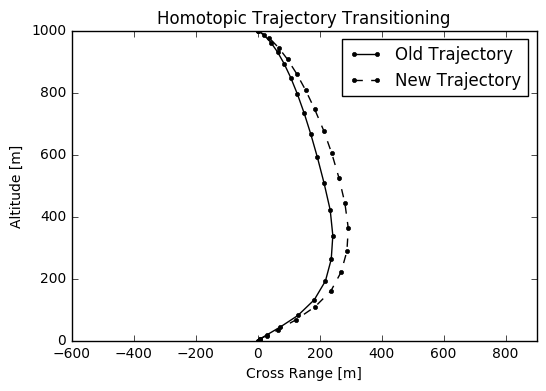

In [102]:
# We now compare this new perturbed trajectory to the previous
tf1, cb1, s1, c1 = prob.Decode(pop.champion.x)
plt.close('all')
plt.figure()
plt.plot(s1[:,0], s1[:,1], 'k.-') # The new trajectory
plt.plot(s[:,0], s[:,1], 'k.--') # The old trajectory
plt.legend(['Old Trajectory', 'New Trajectory'])
plt.title('Homotopic Trajectory Transitioning')
plt.axes().set_aspect('equal', 'datalim')
plt.xlabel('Cross Range [m]')
plt.ylabel('Altitude [m]')
plt.show()

In [103]:
# In essence, we will incrementally perturb the dynamical system's 
# initial state and repeatedly compute new optimal trajectories.
# So, again we store the new trajectory decisions vector
save('HSD1', pop.champion.x)

In [104]:
# Store the current decision
z = pop.champion.x

In [106]:
# Now we try perturbing the initial position rather
# We instantiate the problem
prob = Hermite_Simpson(Point_Lander(si=[-10,1000,10,-5,9900]))
# and create a population for the new problem
pop = population(prob)
# and add the previous population decision vector
pop.push_back(z)

In [107]:
# We then optimise the trajectory, this now will not take long!
pop = alg1.evolve(pop)

  NIT    FC           OBJFUN            GNORM
    1   231    -9.661133E+03     1.000000E+00
    2   462    -9.659388E+03     1.000000E+00
    3   693    -9.659415E+03     1.000000E+00
    4   924    -9.659430E+03     1.000000E+00
    5  1155    -9.659482E+03     1.000000E+00
    6  1386    -9.659588E+03     1.000000E+00
    7  1617    -9.659642E+03     1.000000E+00
    8  1848    -9.659668E+03     1.000000E+00
    9  2079    -9.659717E+03     1.000000E+00
   10  2310    -9.659818E+03     1.000000E+00
   11  2541    -9.659975E+03     1.000000E+00
   12  2772    -9.660410E+03     1.000000E+00
   13  3003    -9.660498E+03     1.000000E+00
   14  3234    -9.660447E+03     1.000000E+00
   15  3465    -9.660451E+03     1.000000E+00
   16  3696    -9.660462E+03     1.000000E+00
   17  3927    -9.660490E+03     1.000000E+00
   18  4158    -9.660630E+03     1.000000E+00
   19  4389    -9.660673E+03     1.000000E+00
   20  4620    -9.660756E+03     1.000000E+00
   21  4851    -9.661134E+03     1

In [108]:
# We now compare this new perturbed trajectory to the previous
tf2, cb2, s2, c2 = prob.Decode(pop.champion.x)

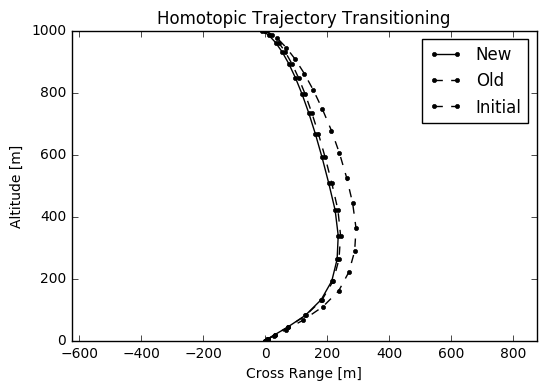

In [109]:
plt.close('all')
plt.figure()
plt.plot(s2[:,0], s2[:,1], 'k.-') # The new trajectory
plt.plot(s1[:,0], s1[:,1], 'k.--') # The old trajectory
plt.plot(s[:,0], s[:,1], 'k.--') # The initial trajectory
plt.legend(['New', 'Old', 'Initial'])
plt.title('Homotopic Trajectory Transitioning')
plt.axes().set_aspect('equal', 'datalim')
plt.xlabel('Cross Range [m]')
plt.ylabel('Altitude [m]')
plt.show()

In [111]:
# Again, save the decision
save('HSD2', pop.champion.x)
z = pop.champion.x

In [112]:
# We instantiate the problem one last time
prob = Hermite_Simpson(Point_Lander(si=[-10,1000,0,-5,9900]))
# and create a population for the new problem
pop = population(prob)
# and add the previous population decision vector
pop.push_back(z)

In [113]:
# We then optimise the trajectory, this now will not take long!
pop = alg1.evolve(pop)

  NIT    FC           OBJFUN            GNORM
    1   231    -9.661133E+03     1.000000E+00
    2   462    -9.626934E+03     1.000000E+00
    3   693    -9.626588E+03     1.000000E+00
    4   924    -9.626690E+03     1.000000E+00
    5  1156    -9.626719E+03     1.000000E+00
    6  1389    -9.626733E+03     1.000000E+00
    7  1622    -9.626747E+03     1.000000E+00
    8  1855    -9.626768E+03     1.000000E+00
    9  2087    -9.626822E+03     1.000000E+00
   10  2319    -9.626901E+03     1.000000E+00
   11  2551    -9.627090E+03     1.000000E+00
   12  2782    -9.628036E+03     1.000000E+00
   13  3013    -9.628661E+03     1.000000E+00
   14  3244    -9.628895E+03     1.000000E+00
   15  3475    -9.629445E+03     1.000000E+00
   16  3706    -9.630024E+03     1.000000E+00
   17  3937    -9.630176E+03     1.000000E+00
   18  4168    -9.630304E+03     1.000000E+00
   19  4399    -9.630390E+03     1.000000E+00
   20  4630    -9.630460E+03     1.000000E+00
   21  4861    -9.630514E+03     1

In [114]:
# We now compare this new perturbed trajectory to the previous
tf3, cb3, s3, c3 = prob.Decode(pop.champion.x)

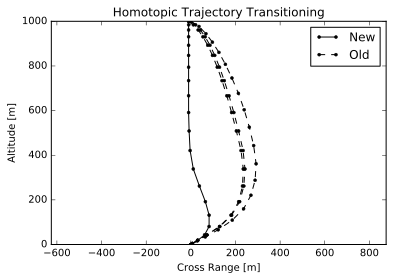

In [122]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.close('all')
plt.figure()
plt.plot(s3[:,0], s2[:,1], 'k.-')
plt.plot(s2[:,0], s2[:,1], 'k.--') # The new trajectory
plt.plot(s1[:,0], s1[:,1], 'k.--') # The old trajectory
plt.plot(s[:,0], s[:,1], 'k.--') # The initial trajectory
plt.legend(['New', 'Old'])
plt.title('Homotopic Trajectory Transitioning')
plt.axes().set_aspect('equal', 'datalim')
plt.xlabel('Cross Range [m]')
plt.ylabel('Altitude [m]')
#plt.savefig('Homotopic_Transitioning.pdf', format='pdf',
#           transparent=True, bbox_inches='tight')
plt.show()

In [123]:
# I think we get it now... time to do this more programmatically
# but first we again save the decision vector
z = pop.champion.x
save('HSD3', z)

# Iterative Pertubation
We will now generate a database of optimal trajectories starting from an arbitrarily defined state threshold.

In [133]:
# Defining the starting area
silb  = array([-100, 500, -100, -30, 8000], float)
siub  = array([100, 1000, 100, 10, 9000], float)
ntraj = 50 # Number of trajectories to generate
# We load the first trajectory we started with
z = load('HSD0.npy')

In [ ]:
# Then we iteratively optimise various trajectories
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.close('all')
plt.figure()
for i in range(ntraj):
    # Initialise the initial state randomly
    si = random.random()*(siub - silb) + silb
    prob = Hermite_Simpson(Point_Lander(si))
    # create a population for the new problem
    pop = population(prob)
    # and add the previous population decision vector
    pop.push_back(z)
    # then evolve the trajectory
    pop = alg1.evolve(pop)
    # name the file to save to
    filename = 'Hermite_Simpson_Decision_' + str(i)
    # extract the decision vector
    z = pop.champion.x
    # save it!
    save(filename, z)
    # figure out what the decision means
    tf, cb, s, c = prob.Decode(z)
    # plot the trajectory
    plt.plot(s[:,0], s[:,1])
plt.xlabel('Cross Range [m]')
plt.ylabel('Altitude [m]')
plt.axes().set_aspect('equal', 'datalim')
plt.show()

  NIT    FC           OBJFUN            GNORM
    1   231    -9.626603E+03     1.000000E+00
    2   462    -8.321497E+03     1.000000E+00
    3   693    -8.272869E+03     1.000000E+00
    4   924    -8.273113E+03     1.000000E+00
    5  1155    -8.273127E+03     1.000000E+00
    6  1387    -8.273135E+03     1.000000E+00
    7  1619    -8.273166E+03     1.000000E+00
    8  1852    -8.273199E+03     1.000000E+00
    9  2084    -8.273294E+03     1.000000E+00
   10  2316    -8.273443E+03     1.000000E+00
   11  2548    -8.273720E+03     1.000000E+00
   12  2780    -8.274236E+03     1.000000E+00
   13  3012    -8.275199E+03     1.000000E+00
   14  3244    -8.276392E+03     1.000000E+00
   15  3475    -8.277804E+03     1.000000E+00
   16  3706    -8.277714E+03     1.000000E+00
   17  3937    -8.278072E+03     1.000000E+00
   18  4168    -8.278253E+03     1.000000E+00
   19  4399    -8.278486E+03     1.000000E+00
   20  4630    -8.278831E+03     1.000000E+00
   21  4861    -8.279774E+03     1